## Tugas Data Mining 3
<br>
Nama: Muh. Yusuf Syam
<br>
NIM: H071191044

<h3> Google Colab Link: </h3>
<br>
<a href="https://colab.research.google.com/drive/1nSiEOSiVcReyb9Z6tmzLruWlqrU3SDFX?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import modul yang dibutuhkan

import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## Import dataset titanic

Penjelasan: Dataset yang diimport adalah dataset yang terdiri dari 3 atribut dan 1 label. Di mana 3 attributnya adalah pclass, sex, dan age. Sementara labelnya adalah survived.

#### Penjelasan kolom:
* pclass: kelas penumpang, di mana kelas 1 merupakan yang tertinggi sedangkan kelas 3 adalah yang terendah
* sex: jenis kelamin penumpang
* age: umur para penumpang
* survived: apakah penumpang tersebut selamat atau tidak, 1 jika selamat dan 0 jika tidak

In [3]:
# Mengimport data

data= pd.read_csv('titanic_data_set.csv')[['pclass', 'sex', 'age', 'survived']]
data.head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


Mengecek dtype masing-masing kolom

In [4]:
for i in data.columns:
    print(f"{i} bertipe data {data[i].dtypes}")

pclass bertipe data int64
sex bertipe data object
age bertipe data float64
survived bertipe data int64


## Handle Missing Value

In [5]:
# Mengecek apakah data mempunyai nilai NaN
data.isna().sum()

pclass        0
sex           0
age         177
survived      0
dtype: int64

In [6]:
# Mengisi data age yang NaN dengan mean
data['age'].fillna(data['age'].mean(), inplace=True)

data.isna().sum()

pclass      0
sex         0
age         0
survived    0
dtype: int64

## Categorical encoding using Label-Encoding and One-Hot-Encoder

1. One Hot Encoding

In [7]:
one_hot_encoded_data = pd.get_dummies(data, columns = ["survived"])
one_hot_encoded_data

,pclass,sex,age,survived_0,survived_1
0,3,male,22.000000,1,0
1,1,female,38.000000,0,1
2,3,female,26.000000,0,1
3,1,female,35.000000,0,1
4,3,male,35.000000,1,0
...,...,...,...,...,...
886,2,male,27.000000,1,0
887,1,female,19.000000,0,1
888,3,female,29.699118,1,0
889,1,male,26.000000,0,1


2. Label Encoding

In [8]:
# Encode label
Le= LabelEncoder()

for i in data.columns: 
    data[i]= Le.fit_transform(data[i])
    
data

,pclass,sex,age,survived
0,2,1,28,0
1,0,0,52,1
2,2,0,34,1
3,0,0,48,1
4,2,1,48,0
...,...,...,...,...
886,1,1,35,0
887,0,0,24,1
888,2,0,39,0
889,0,1,34,1


## Normalization

1. Z-score

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler
data['age']= std_scaler.fit_transform(np.array(data['age']).reshape(-1,1))

data

,pclass,sex,age,survived
0,2,1,-0.673387,0
1,0,0,0.763709,1
2,2,0,-0.314113,1
3,0,0,0.524193,1
4,2,1,0.524193,0
...,...,...,...,...
886,1,1,-0.254234,0
887,0,0,-0.912903,1
888,2,0,-0.014718,0
889,0,1,-0.314113,1


## Detect, Handle and Visualize Outliers

<AxesSubplot:ylabel='age'>

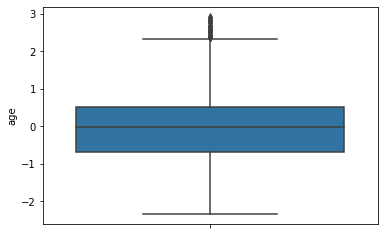

In [10]:
import seaborn as sns
sns.boxplot(y=data['age'])

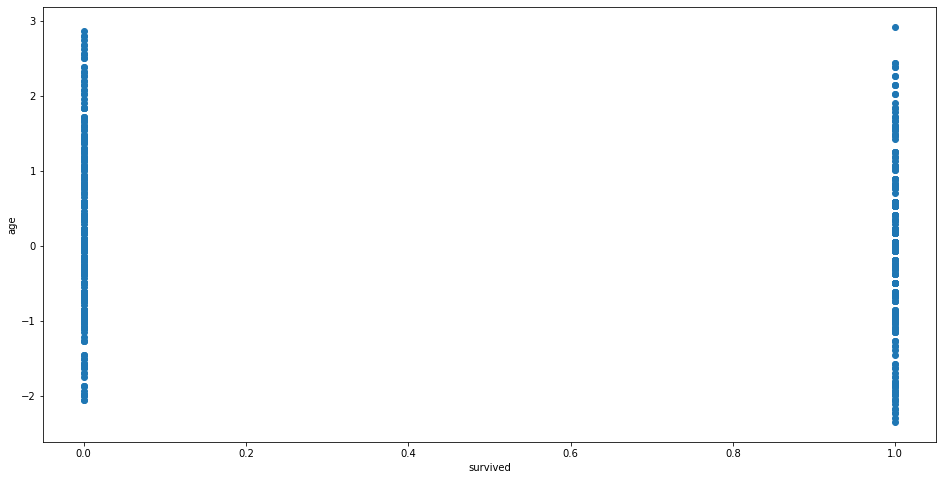

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['survived'], data['age'])
ax.set_xlabel('survived')
ax.set_ylabel('age')
plt.show()

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


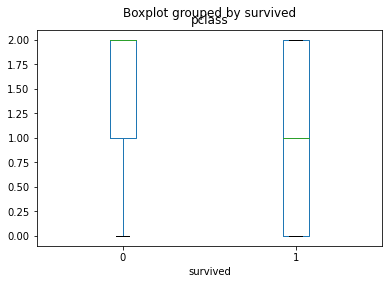

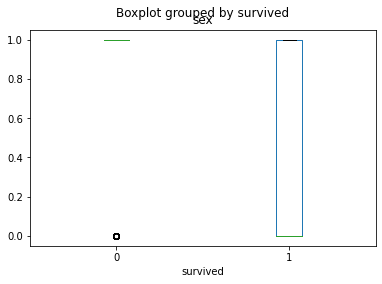

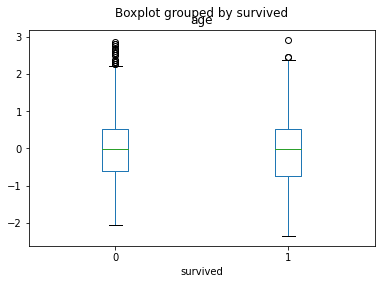

In [12]:
import matplotlib.pyplot as plt

x = data.drop("survived",1)
columns_name = list(x.columns)

for i in columns_name:
    data.boxplot(by ='survived', column =[i], grid = False)

In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['age']))
print(z)

threshold = 3
print(np.where(z > threshold))
print(z)

0      0.673387
1      0.763709
2      0.314113
3      0.524193
4      0.524193
         ...   
886    0.254234
887    0.912903
888    0.014718
889    0.314113
890    0.224798
Name: age, Length: 891, dtype: float64
(array([], dtype=int64),)
0      0.673387
1      0.763709
2      0.314113
3      0.524193
4      0.524193
         ...   
886    0.254234
887    0.912903
888    0.014718
889    0.314113
890    0.224798
Name: age, Length: 891, dtype: float64


In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pclass      1.00000
sex         1.00000
age         1.19758
survived    1.00000
dtype: float64


In [15]:
print(data.shape)

(891, 4)


In [16]:
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(872, 4)


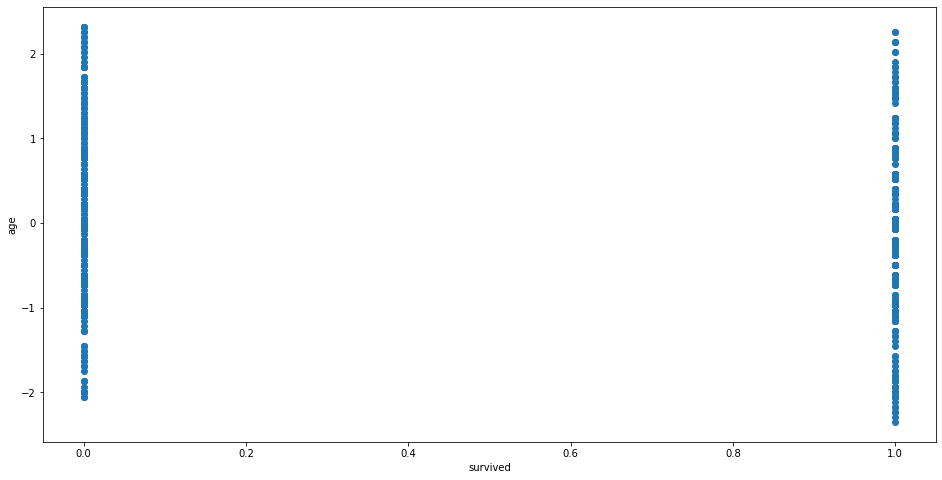

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['survived'], df_out['age'])
ax.set_xlabel('survived')
ax.set_ylabel('age')
plt.show()

array([<AxesSubplot:ylabel='survived'>], dtype=object)

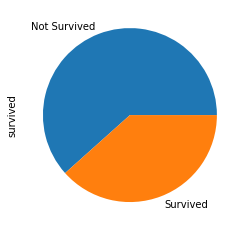

In [18]:
# Plot data untuk melihat perbandingan class bernilai survived atau tidak
survived_map= {0:'Not Survived', 1:'Survived'}

data['survived'].map(survived_map).value_counts().plot(kind='pie', subplots=True)

## Resampling

In [19]:
X= data.drop('survived', axis='columns')
y= data['survived']

print(Counter(y))

Counter({0: 549, 1: 342})


#### A. Oversampling

In [20]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

Counter({0: 549, 1: 549})


In [21]:
over_sampled_data= pd.concat([X_ros, y_ros], axis='columns')
over_sampled_data

,pclass,sex,age,survived
0,2,1,-0.673387,0
1,0,0,0.763709,1
2,2,0,-0.314113,1
3,0,0,0.524193,1
4,2,1,0.524193,0
...,...,...,...,...
1093,2,1,-0.254234,1
1094,1,1,0.404435,1
1095,0,1,-0.014718,1
1096,1,0,1.602016,1


array([<AxesSubplot:ylabel='survived'>], dtype=object)

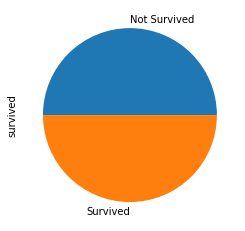

In [22]:
survived_map= {0:'Not Survived', 1:'Survived'}

over_sampled_data.survived.map(survived_map).value_counts().plot(kind='pie', subplots=True)

Bisa kita lihat sekarang datanya seimbang

1. SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smz, y_sm = smote.fit_resample(X, y)

print(Counter(y_sm))

Counter({0: 549, 1: 549})


2. SMOTE Tomek

In [24]:
from imblearn.combine import SMOTETomek

smote= SMOTETomek(sampling_strategy='minority')
X_smz, y_sm= smote.fit_resample(X, y)

print(Counter(y_sm))

Counter({0: 544, 1: 544})


#### B. Undersampling

In [25]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({0: 342, 1: 342})


1.  TOMEK Links

In [26]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl= tl.fit_resample(X, y)

print(Counter(y_tl))

Counter({0: 546, 1: 342})


In [27]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

Counter({0: 342, 1: 342})


c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\imblearn\under_sampling\_prototype_generation\_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (179) found smaller than n_clusters (342). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


## Klasifikasi

In [28]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

len(x_test), len(x_train)

(179, 712)

[Text(127.09618226600985, 212.26285714285714, 'X[1] <= 0.5\ngini = 0.477\nsamples = 100.0%\nvalue = [0.608, 0.392]'),
 Text(48.65320197044335, 201.90857142857143, 'X[0] <= 1.5\n0.381\n35.7%\n[0.256, 0.744]'),
 Text(16.492610837438423, 191.5542857142857, 'X[2] <= -1.961\n0.12\n19.8%\n[0.064, 0.936]'),
 Text(9.895566502463055, 181.2, 'X[0] <= 0.5\n0.5\n0.3%\n[0.5, 0.5]'),
 Text(6.59704433497537, 170.84571428571428, '0.0\n0.1%\n[1.0, 0.0]'),
 Text(13.19408866995074, 170.84571428571428, '0.0\n0.1%\n[0.0, 1.0]'),
 Text(23.089655172413792, 181.2, 'X[2] <= -0.554\n0.108\n19.5%\n[0.058, 0.942]'),
 Text(19.79113300492611, 170.84571428571428, '0.0\n4.8%\n[0.0, 1.0]'),
 Text(26.38817733990148, 170.84571428571428, 'X[2] <= -0.224\n0.141\n14.7%\n[0.076, 0.924]'),
 Text(13.19408866995074, 160.49142857142857, 'X[2] <= -0.434\n0.375\n2.2%\n[0.25, 0.75]'),
 Text(6.59704433497537, 150.13714285714286, 'X[0] <= 0.5\n0.198\n1.3%\n[0.111, 0.889]'),
 Text(3.298522167487685, 139.78285714285715, '0.0\n0.4%\n[0

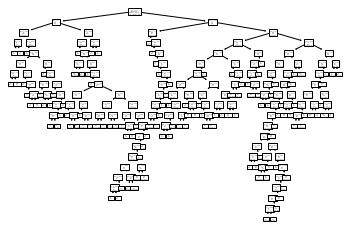

In [29]:
dct_model= tree.DecisionTreeClassifier()
dct_model.fit(x_train, y_train)

tree.plot_tree(dct_model, label='root', proportion=True)

In [30]:
pred_x= dct_model.predict(x_test)

accuraccy= (pred_x==y_test).sum()/len(y_test)
accuraccy

0.8156424581005587

Confusion matrix:
 [[103  13]
 [ 20  43]]


c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


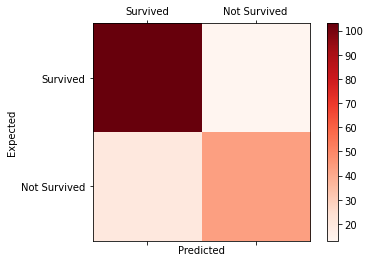

In [32]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_x)
print('Confusion matrix:\n', conf_mat)


labels = ['Survived', 'Not Survived']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()